In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/cleaned_air_quality.csv")

# detect date column or create index time
date_cols = [c for c in df.columns if "date" in c.lower() or "time" in c.lower()]
date_col = date_cols[0] if date_cols else "_index_time"

if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
else:
    df["_index_time"] = np.arange(len(df))

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
col1 = num_cols[0]
col2 = num_cols[1] if len(num_cols) > 1 else num_cols[0]

plt.rcParams["figure.figsize"] = (10,5)

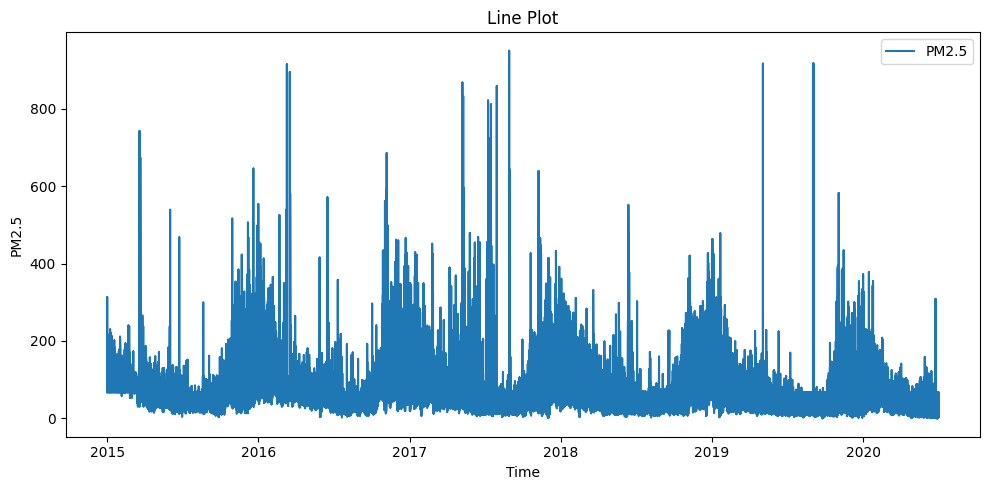

In [2]:
#1. Line Plot
plt.plot(df[date_col], df[col1], label=col1)
plt.title("Line Plot")
plt.xlabel("Time")
plt.ylabel(col1)
plt.legend()
plt.tight_layout()
plt.show()

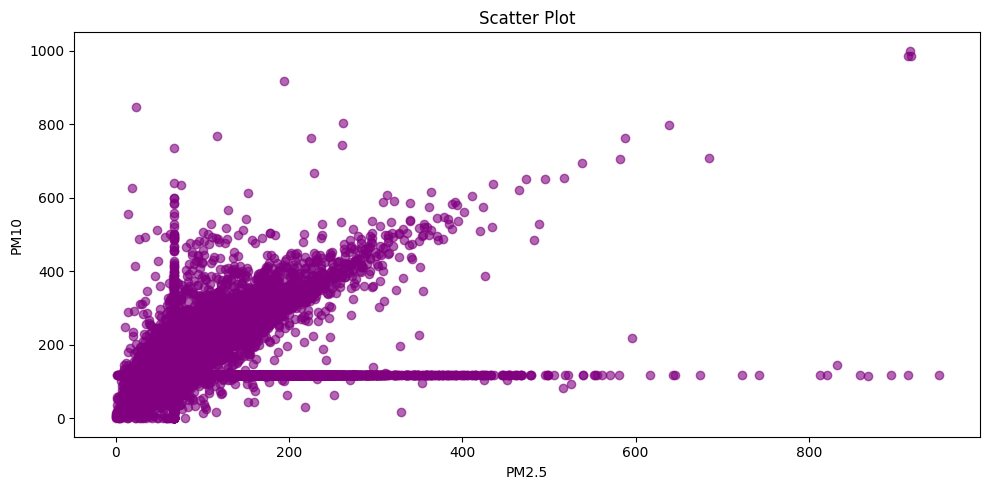

In [3]:
#2. Scatter Plot
plt.scatter(df[col1], df[col2], color="purple", alpha=0.6)
plt.title("Scatter Plot")
plt.xlabel(col1)
plt.ylabel(col2)
plt.tight_layout()
plt.show()

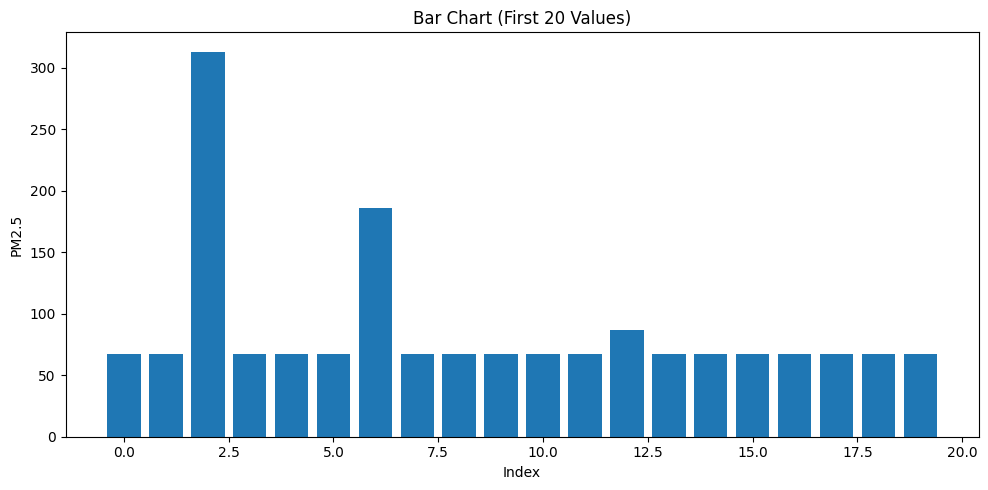

In [4]:
#3. Bar Chart
plt.bar(df.index[:20], df[col1].head(20))
plt.title("Bar Chart (First 20 Values)")
plt.xlabel("Index")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

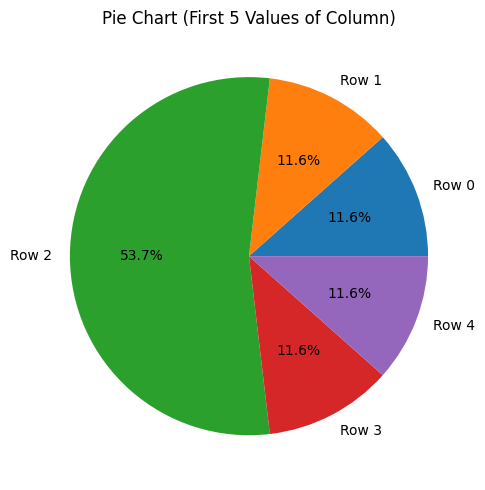

In [5]:
#4. Pie Chart
values = df[col1].head(5)
labels = [f"Row {i}" for i in values.index]

plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Pie Chart (First 5 Values of Column)")
plt.tight_layout()
plt.show()

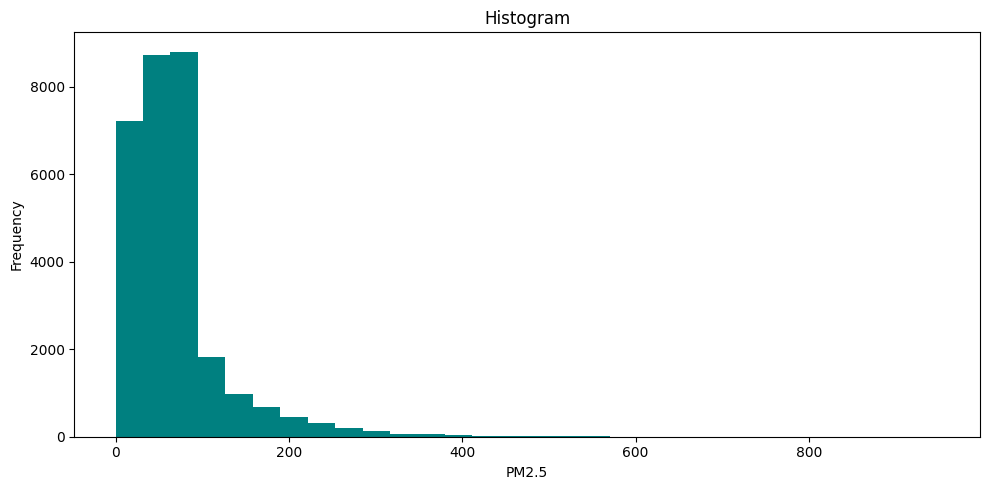

In [6]:
#5. Histogram
plt.hist(df[col1].dropna(), bins=30, color="teal")
plt.title("Histogram")
plt.xlabel(col1)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

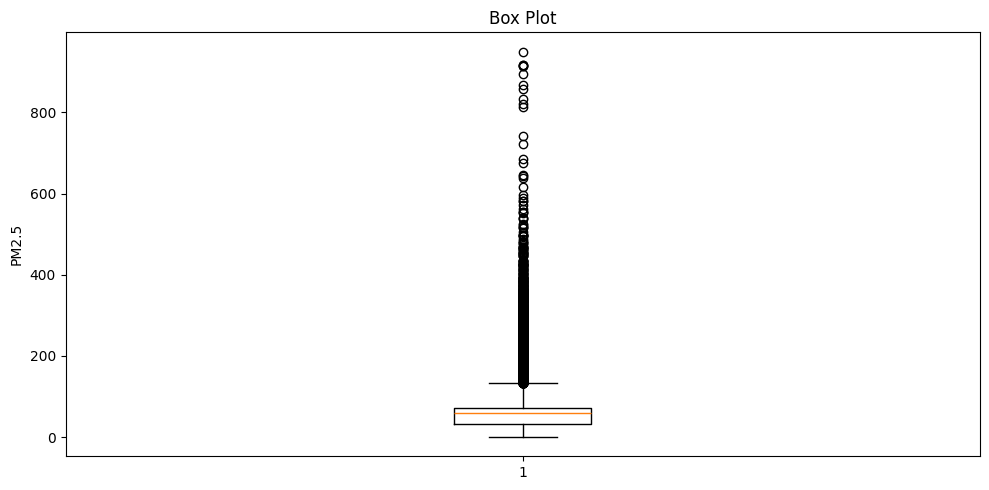

In [7]:
#6. Box Plot
plt.boxplot(df[col1].dropna(), vert=True)
plt.title("Box Plot")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

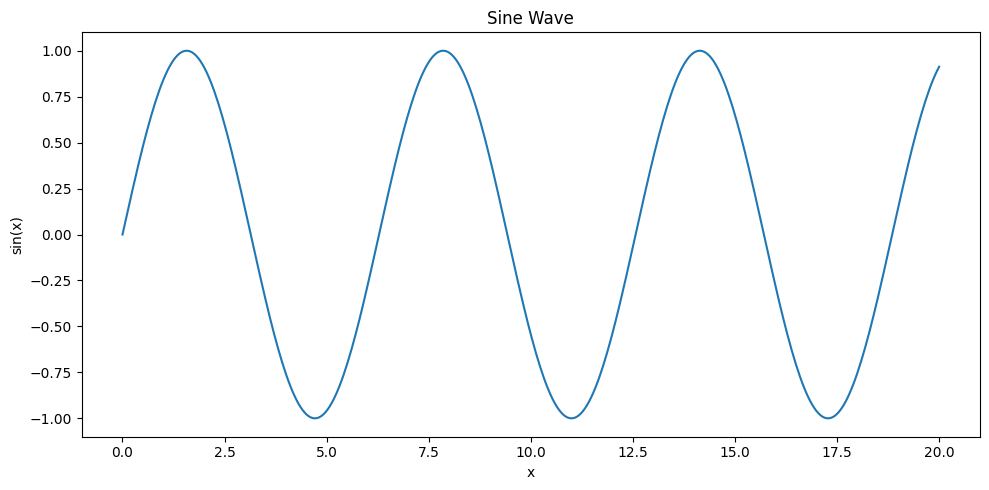

In [8]:
#7. Sine Wave
x = np.linspace(0, 20, 400)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.tight_layout()
plt.show()

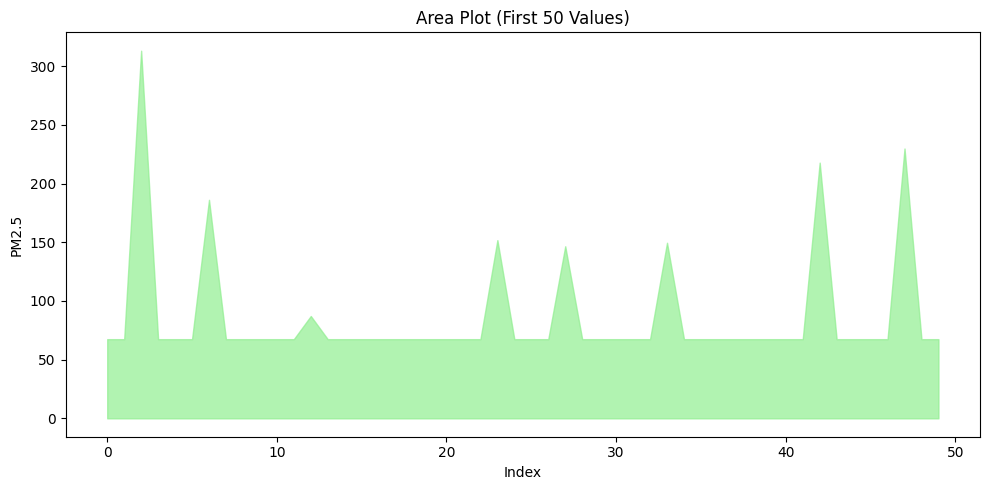

In [9]:
#8. Area Plot
plt.fill_between(df.index[:50], df[col1].head(50), color="lightgreen", alpha=0.7)
plt.title("Area Plot (First 50 Values)")
plt.xlabel("Index")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

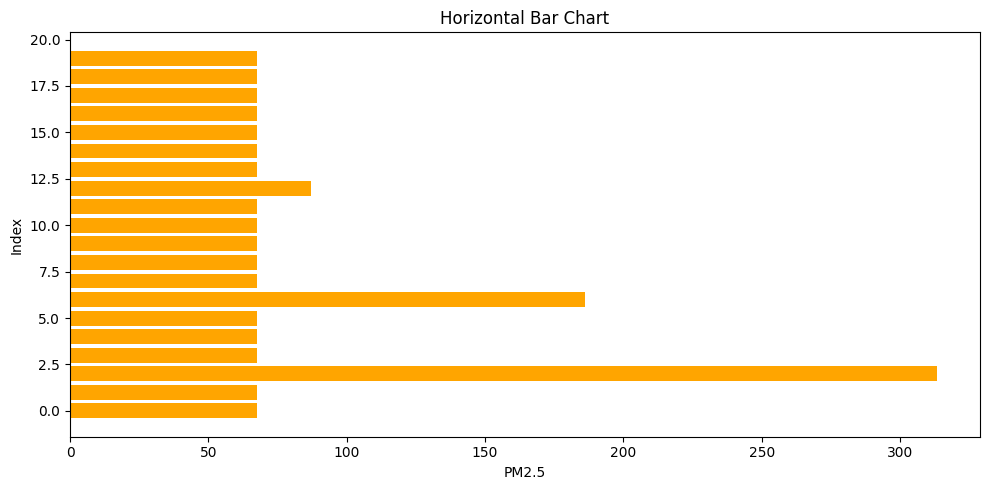

In [10]:
#9. Horizontal Bar Chart
plt.barh(df.index[:20], df[col1].head(20), color="orange")
plt.title("Horizontal Bar Chart")
plt.xlabel(col1)
plt.ylabel("Index")
plt.tight_layout()
plt.show()

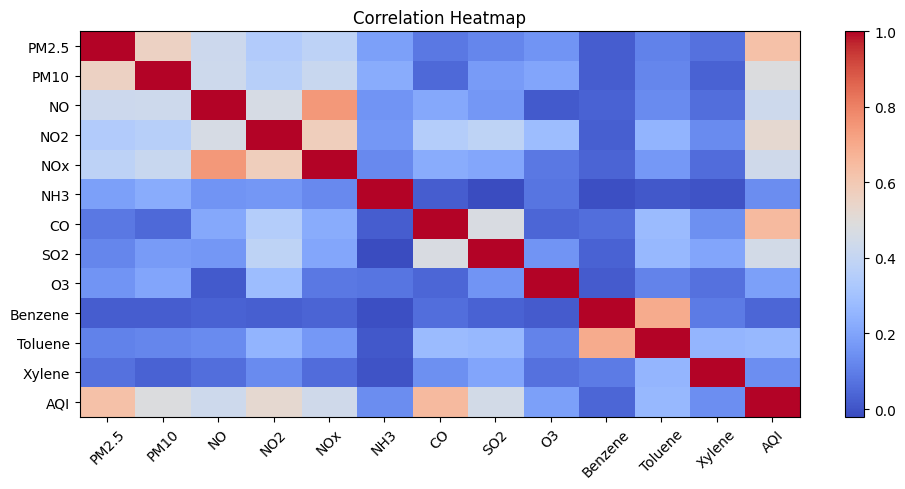

In [11]:
#10. Correlation Heatmap
corr = df[num_cols].corr()

plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()